In [ ]:
import csv
import networkx as nx

G = nx.Graph()

with open('SCOPUS_complexsystems_economics.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    # each row contains information for a source
    elist = []
    nlist = {} # key:index, value:title
    tlist = []
    
    index = 0
    for row in reader:
        # add node with unique identifier
        N1 = row['Title']
        if N1 not in tlist: 
            tlist.append(N1)
            e1 = index
            nlist[index] = N1
            index = index + 1
        # add an edge for each source and its references
        refs = row['References'].split(';')
        for ref in refs: 
            # find Title in reference
            title = ref[0:ref.find('(')]
            authors = ""
            while (title.find('.,') != -1): 
                authors = authors + title[0:title.find('.,')]
                title = title[title.find('.,') + 2:]
            N2 = title
            if 'https://' not in title and 'http://' not in title and title != " " and title != "": 
                # only include journal-type references 
                N2 = title
                if N2 not in tlist: 
                    tlist.append(N2)
                    e2 = index
                    nlist[index] = N2
                    index = index + 1
                    edge = (e1,e2) # e1 references e2
                    elist.append(edge)
                    
G.add_edges_from(elist)

In [21]:
print(len(elist))

27894


In [20]:
print(len(tlist))

29111


In [18]:
print(len(nlist))

29111


In [ ]:
print(nlist)

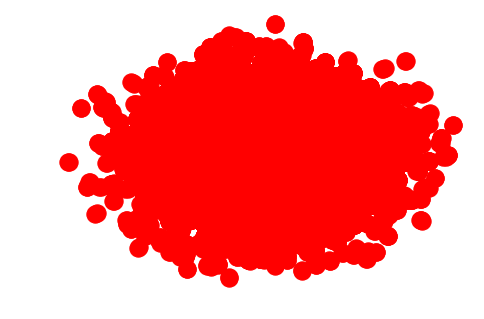

In [22]:
pos = nx.spring_layout(G,k=0.15,iterations=20)
nx.draw(G)